## Gas Gain Analysis
The goal of the project is to calculate the value of the gain of a gas in a drift chamber with two methods:


For the first method the gas gain $ G $ of the drift chamber is defined as:

$$
G = \frac{Q_{\text{mean}}}{n_e \cdot e \cdot n_c \cdot F}
$$

Where:  
- $ Q_{\text{mean}} $ is the mean collected charge,  
- $ n_{ele} $ is the number of primary ionization electrons for each cluster, it is fixed at 1.6,
- $ e $ is the elementary charge $ e \approx 1.602 \times 10^{-19} \, \text{C} $,
- $ n_c $ is the number of clusters, that is a localized group of ionization electrons,
- $ F $ is an experimental parameter set at 0.231

For the second method the formula that is used is:

$$
G = \frac{v_{\text{out}} \cdot C_{T}}{n_e \cdot e \cdot F}
$$
Where:
- $  C_{T} $ is the total capacity of the instrument, with the value of $ 102.786$ pF,
- $ v_{\text{out}}$ is the mean amplitude of the measures

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [71]:
#load of the charge data
data_c = np.loadtxt("F1--F1-charge-060525--00000.txt", skiprows = 1 , delimiter = ",")

In [72]:
x = data_c[:,0]
y = data_c[:,1]

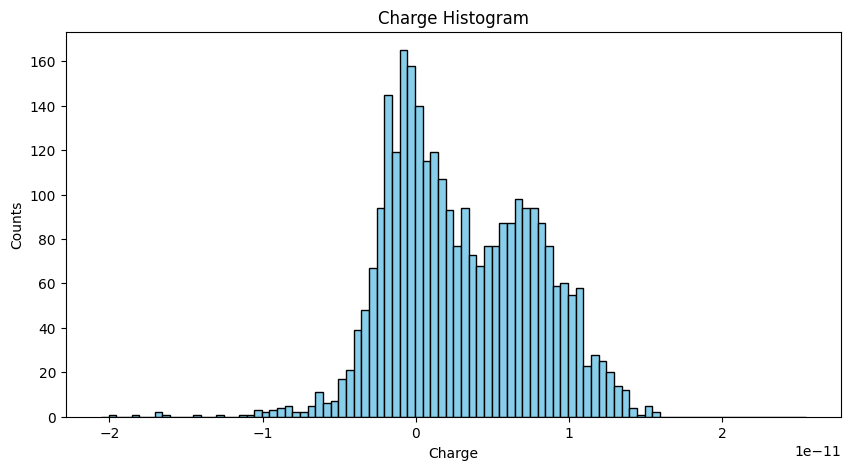

In [73]:
plt.figure(figsize = (10,5))
plt.bar(x,y, width = 0.5e-12, color = "skyblue", edgecolor = "black")
plt.title("Charge Histogram")
plt.xlabel("Charge")
plt.ylabel("Counts")
plt.show()

a charge that is near zero is associated with a non-physical measure, so the near zero values are deleted

In [74]:
x_pos = x[ x > 0.5e-11]
y_pos = y[ x > 0.5e-11]

Text(0, 0.5, 'Counts')

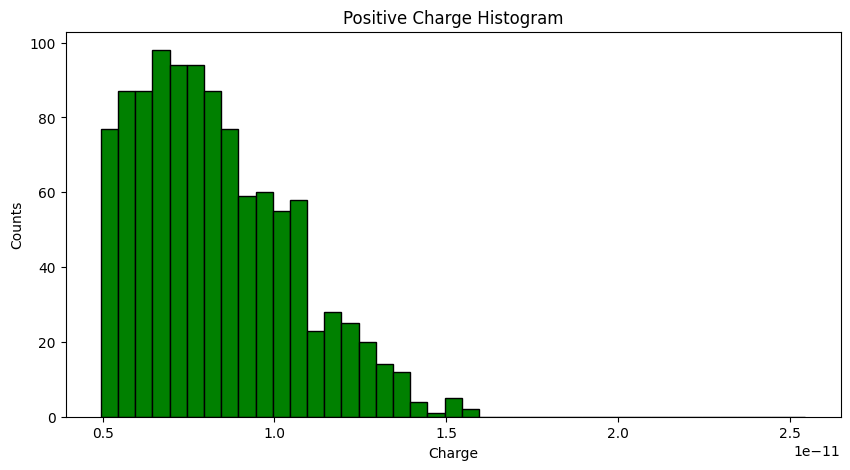

In [75]:
plt.figure(figsize = (10,5))
plt.bar(x_pos,y_pos, width = 0.5e-12, color = "green", edgecolor = "black")
plt.title("Positive Charge Histogram")
plt.xlabel("Charge")
plt.ylabel("Counts")

We fit the charge histogram with a gaussian distribution to get the mean value of the charge in the measures 

In [76]:
def gaussian(x,amplitude, mean,sigma):
    return amplitude*np.exp(- ((x - mean)**2) / (2 * sigma**2))

In [77]:
guess = [np.max(y_pos), 0.7e-11, 1e-12]

In [78]:
param_c, _ = curve_fit(gaussian, x_pos, y_pos, p0 = guess)


In [79]:
x_fit = np.linspace(np.min(x_pos), np.max(x_pos), 500)

In [80]:
y_fit = gaussian(x_fit, *param_c)

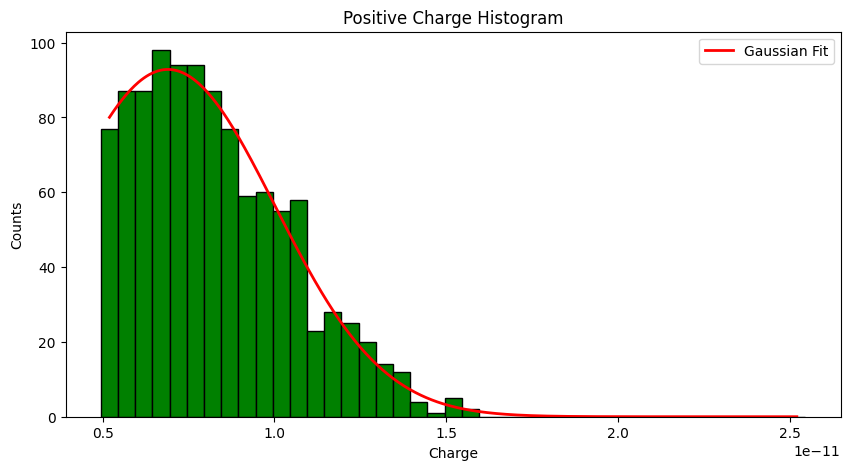

Fitted Amplitude: 
92.82023986587328
Fitted Mean: 
6.899512992805073e-12
Fitted Sigma: 
3.1208990944567538e-12


In [81]:
plt.figure(figsize = (10,5))
plt.bar(x_pos,y_pos, width = 0.5e-12, color = "green", edgecolor = "black")
plt.title("Positive Charge Histogram")
plt.xlabel("Charge")
plt.ylabel("Counts")
plt.plot(x_fit, y_fit, color = "red", linewidth = 2, label = "Gaussian Fit")
plt.legend()
plt.show()
print(f"Fitted Amplitude: \n{param_c[0]}")
print(f"Fitted Mean: \n{param_c[1]}")
print(f"Fitted Sigma: \n{param_c[2]}")
mean_charge = param_c[1]

The data of the amplitude of the signal is analyzed to get the mean value of the amplitude with a guassian fit 

In [82]:
data_a = np.loadtxt("F2--F1amplitude-060525--00000.txt", skiprows= 1, delimiter= ",")
x_a = data_a[:,0]
y_a =  data_a[:,1]

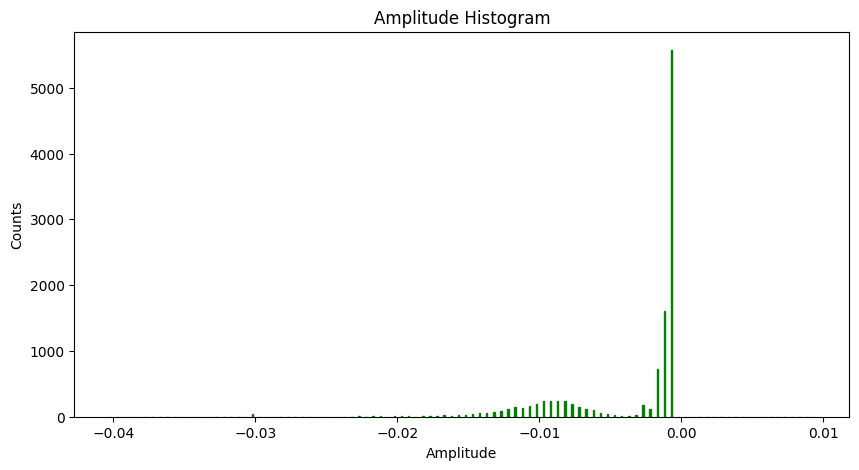

In [83]:
plt.figure(figsize = (10,5))
plt.bar(x_a,y_a, width = 1e-4, color = "green", edgecolor = "green")
plt.xlabel("Amplitude")
plt.ylabel("Counts")
plt.title("Amplitude Histogram")
plt.show()

The values of that are far from the gaussian-like distribution are non physical, they represent background noise and they need to be removed

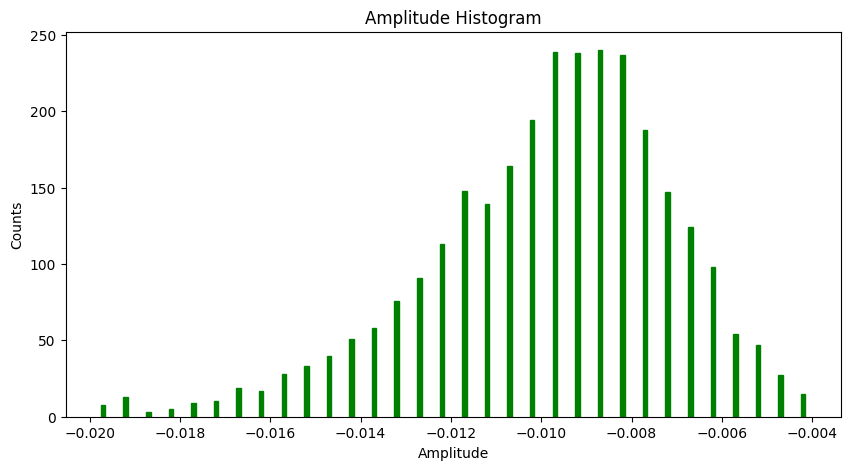

In [84]:

x_neg = x_a[(x_a < -0.004) & (x_a > -0.020)]
y_neg = y_a[(x_a < -0.004) & (x_a > -0.020)]
plt.figure(figsize = (10,5))
plt.bar(x_neg,y_neg, width = 1e-4, color = "green", edgecolor = "green")
plt.xlabel("Amplitude")
plt.ylabel("Counts")
plt.title("Amplitude Histogram")
plt.show()

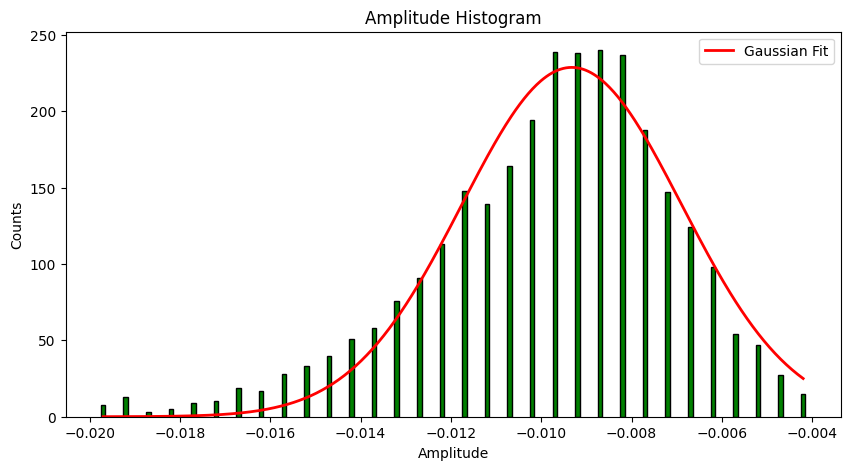

Fitted Amplitude: 
228.64840294995267
Fitted Mean: 
-0.009324430410139953
Fitted Sigma: 
0.002435776515362976


In [85]:
guess = [np.max(y_neg), -0.010, 0.002]
param_a, _ = curve_fit(gaussian, x_neg, y_neg,  p0 = guess)
x_fit = np.linspace(np.min(x_neg), np.max(x_neg), 500)
y_fit = gaussian(x_fit, *param_a)
plt.figure(figsize = (10,5))
plt.bar(x_neg,y_neg, width = 1e-4, color = "green", edgecolor = "black")
plt.title("Amplitude Histogram")
plt.xlabel("Amplitude")
plt.ylabel("Counts")
plt.plot(x_fit, y_fit, color = "red", linewidth = 2, label = "Gaussian Fit")
plt.legend()
plt.show()
print(f"Fitted Amplitude: \n{param_a[0]}")
print(f"Fitted Mean: \n{param_a[1]}")
print(f"Fitted Sigma: \n{param_a[2]}")
mean_amplitude = param_a[1]

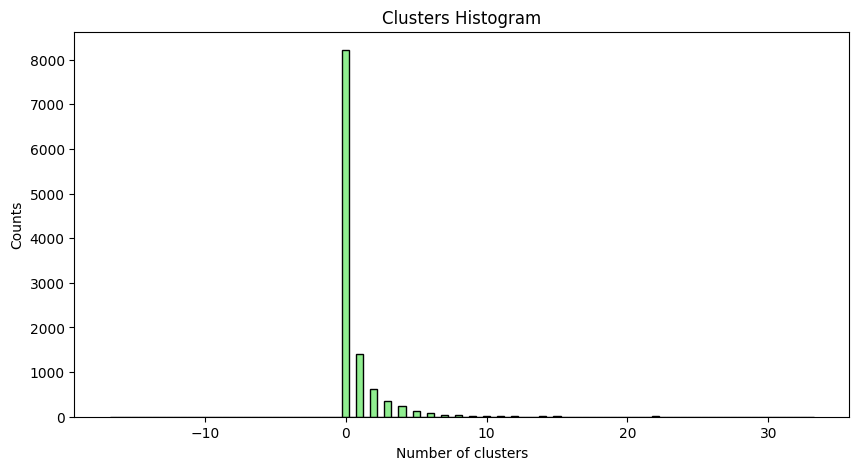

In [86]:
data_c = np.loadtxt("F3--F1cluster-060525--00000.txt", skiprows= 1, delimiter= ",")
x_c = data_c[:,0]
y_c =  data_c[:,1]
plt.figure(figsize = (10,5))
plt.bar(x_c,y_c, width = 0.5, color = "lightgreen", edgecolor = "black")
plt.xlabel("Number of clusters")
plt.ylabel("Counts")
plt.title("Clusters Histogram")
plt.show()

the mean number of clusters in the measures is calculated with a weighted mean

In [87]:
x_pos = x_c[x_c > 0]
y_pos = y_c[x_c > 0]
mean_clusters = np.average(x_pos, weights = y_pos)
print(mean_clusters)

2.5827993254637436


The gain is calculated with the first method

In [88]:
gain_1 = mean_charge/(1.602e-19*1.6*mean_clusters*0.231)
print(gain_1)

45116281.54902651


then with the second method

In [89]:
gain_2 = abs(mean_amplitude)*102.876e-12/(1.602e-19*1.6*0.231)
print(gain_2)

16201003.191248318


In [90]:
print(np.format_float_scientific(gain_1))
print(np.format_float_scientific(gain_2))

4.511628154902651e+07
1.6201003191248318e+07


The two different methods arrive at the same order of magnitude, for the purpose of the project the goal is achieved